**Legend** <br>
<div class="alert alert-block col-md-7 alert-info">Question</div>
<div class="alert alert-block col-md-7 alert-warning">Partial conclusions</div> 
<div class="alert alert-block col-md-7 alert-success">Conclusion</div>

**Imports**

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import json

import sys  
sys.path.append('../')

import modules.exploratory_data_analysis.base_rates as base_rates
import modules.exploratory_data_analysis.statistical_analysis as statistical_analysis

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
statistical_analysis = reload(statistical_analysis)

# Load extended dataset

In [116]:
df = pd.read_csv("..\..\output\extended_dataset.csv", sep=";")
df.head()

,DATE,YEAR,Train,ID,URL,HQ,AUT_COMM,PLAIN_ML,PLAIN_WO,DEFEN_ML,...,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,JUDGE_ID,Unnamed: 113
0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,3,2,5,4,1,0,NaN
1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,1,1,1,3,1,1,NaN
2,43607,2019,0,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,4,3,8,6,1,1,NaN
3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,2,1,3,2,0,2,NaN
4,43818,2019,0,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,Barcelona,Cataluña,1,0,0,...,0,0,0,2,0,3,0,1,3,NaN


# Exploratory data analysis

## Plaintiffs gender

The plaintiff gender is embeded in the PLAIN_ML attribute which is 0 for female and 1 for male. We also have the PLAIN_WO attribute, which tells the opposite.

Counter({1: 1131, 0: 753})


Female plaintiff: 39.97%
Male plaintiff: 60.03%




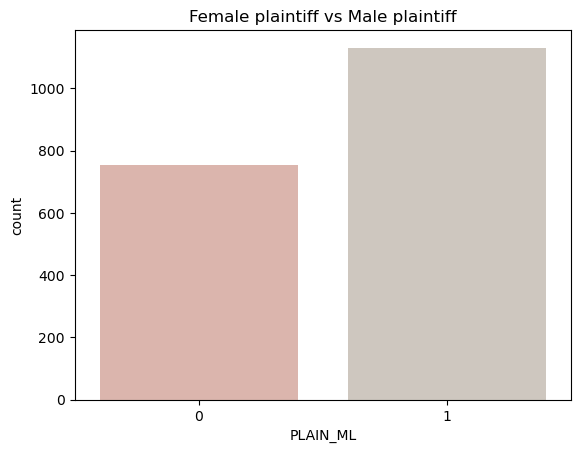

In [117]:
base_rates.percentages(df, "PLAIN_ML", "Female plaintiff", "Male plaintiff")

<div class="alert alert-block alert-warning col-md-12">

<p>
There are 1131 rows with male plaintiffs and 753 with female plaintiffs in the dataset. This means that 60.03% of the plaintiffs are males and 39.97% are females.
</p>

</div>

### Same gender parents

In [118]:
same_gender_df = df[df['PLAIN_ML'] == df["DEFEN_ML"]]
print("Plaintiff wins: ",len(same_gender_df[same_gender_df['WINWIN']==1]))
same_gender_df

Plaintiff wins:  0


,DATE,YEAR,Train,ID,URL,HQ,AUT_COMM,PLAIN_ML,PLAIN_WO,DEFEN_ML,...,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,JUDGE_ID,Unnamed: 113
1086,43495,2019,1,APM_2019_980,http://labje.unizar.es/sentencias/APM_2019_980...,Madrid,Comunidad de Madrid,0,1,0,...,0,0,0,0,4,0,13,0,155,NaN
1711,43781,2019,0,APV_2019_4575,http://labje.unizar.es/sentencias/APV_2019_457...,Valencia,Comunidad Valenciana,0,1,0,...,-1,0,0,2,4,3,10,1,284,NaN
1836,43745,2019,0,APZ_2019_2314,http://labje.unizar.es/sentencias/APZ_2019_231...,Zaragoza,Aragón,0,1,0,...,0,0,0,5,1,8,1,1,306,NaN


<div class="alert alert-block alert-warning col-md-12">

<p>
There are only three rows in the dataset with same gender parents. All three correspont to female plaintiff and defendant. None of the three plaintiffs win.
</p>

</div>

## Judges gender

The judge gender is embeded in the JUDGE_ML attribute which is 0 for female and 1 for male.

Counter({1: 1194, 0: 690})


Female judges: 36.62%
Male judges: 63.38%




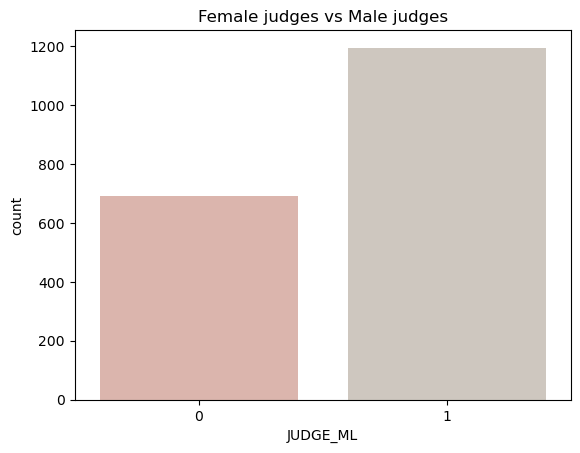

In [119]:
base_rates.percentages(df, "JUDGE_ML", "Female judges", "Male judges")

<div class="alert alert-block alert-warning col-md-12">

<p>
There are 1194 rows with male judges and 690 with female judges in the dataset. This means that 63.38% of the judges are males and 36.62% are females.
</p>

</div>

## Victory rates

The WINWIN attribute corresponds to the court decision with respect to the sole/joint custody request. Is is 1 when the court decides sole custody or joint custody as the plaintiff has requested, and 0 if it decides the opposite as the plaintiff requested.

Counter({0: 1549, 1: 335})


Plaintiff loses: 82.22%
Plaintiff wins: 17.78%




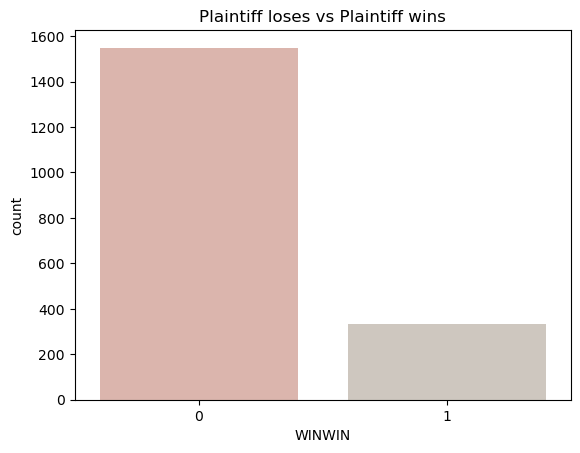

In [120]:
base_rates.percentages(df, "WINWIN", "Plaintiff loses", "Plaintiff wins")

<div class="alert alert-block alert-warning col-md-12">

<p>
There are 1549 rows where the decision of the court is the opposite as the plaintiff request and 335 where the plaintiff wins. Meaning an 82.22% and 17.78% distribution.<br>
</p>

</div>

### Victory rates by plaintiff gender

In [121]:
base_rates.percentages_by_group(df, "WINWIN", "PLAIN_ML", "Female plaintiff wins", "Male plaintiff win", zero_case = True, group_1_zero = "Female plaintiff loses", group_2_zero = "Male plaintiff loses")

PLAIN_ML = 0 -->  WINWIN: Counter({0: 645, 1: 108})

Female plaintiff loses: 85.66%
Female plaintiff wins: 14.34%

PLAIN_ML = 1 -->  WINWIN: Counter({0: 904, 1: 227})

Male plaintiff loses: 79.93%
Male plaintiff win: 20.07%


In [122]:
base_rates.ratio_by_group(df, "WINWIN", "PLAIN_ML", "Female", "Male")

WINWIN = 0 -->  Ratio between Female/Male is: 1.07
WINWIN = 1 -->  Ratio between Female/Male is: 0.71


In [123]:
statistical_analysis.k_test(df, "WINWIN", "PLAIN_ML")

Kolmogorov-Smirnov test to determine if there is significant difference between the two groups by quantifying the difference between the arithmetic means 

------> Statistic: 401430.0

------> p-value: 0.001451270330983693

Since p-value is smaller than alpha, we REJECT the null hypothesis H0. Thus, there is a significant difference between both groups


<div class="alert alert-block alert-warning col-md-12">

<p>
We can observe that males have more chances to win than females in this dataset. 
</p>

</div>

### Victory rates by judge gender

In [124]:
base_rates.percentages_by_group(df, "WINWIN", "JUDGE_ML", "Plaintiff wins with female judges", "Plaintiff wins with male judges", zero_case = True, group_1_zero = "Plaintiff loses with female judges", group_2_zero = "Plaintiff loses with male judges")

JUDGE_ML = 0 -->  WINWIN: Counter({0: 548, 1: 142})

Plaintiff loses with female judges: 79.42%
Plaintiff wins with female judges: 20.58%

JUDGE_ML = 1 -->  WINWIN: Counter({0: 1001, 1: 193})

Plaintiff loses with male judges: 83.84%
Plaintiff wins with male judges: 16.16%


In [125]:
base_rates.ratio_by_group(df, "WINWIN", "JUDGE_ML", "Female", "Male")

WINWIN = 0 -->  Ratio between Female/Male is: 0.95
WINWIN = 1 -->  Ratio between Female/Male is: 1.27


In [126]:
statistical_analysis.k_test(df, "WINWIN", "JUDGE_ML")

Kolmogorov-Smirnov test to determine if there is significant difference between the two groups by quantifying the difference between the arithmetic means 

------> Statistic: 430119.0

------> p-value: 0.01576884746250585

Since p-value is smaller than alpha, we REJECT the null hypothesis H0. Thus, there is a significant difference between both groups


<div class="alert alert-block alert-warning col-md-12">

<p>
We can observe that female judges tend to be more involved in cases where the plaintiff wins.
</p>

</div>

### Victory rates by gender

In [127]:
base_rates.percentages_cross_groups(df, "WINWIN", "PLAIN_ML", "JUDGE_ML", "female plaintiff", "male plaintiff", "female judge", "male judge")

WINWIN percentage for female plaintiff, female judge --> 16.97%
WINWIN percentage for female plaintiff, male judge --> 12.86%
WINWIN percentage for male plaintiff, female judge --> 22.91%
WINWIN percentage for male plaintiff, male judge --> 18.4%


<div class="alert alert-block alert-warning col-md-12">

<p>
With both plaintiff genders if the judge is a female plaintiffs are more likely to than if the judge is a male. Also males are more likely to win, with both judge genders.<br><br>
    
It does not seem a priori that female judges favor female plaintiffs and male judges favor male plaintiffs. Neither the opposite. <br>
</p>

</div>

## Request nature (sole vs joint)

One of the request attributes is the RQ_JOINT attribute. It is 1 if the plaintiff requests joint custody and 0 if sole custody is requested. 

Counter({1: 1031, 0: 853})


Sole custody request: 45.28%
Join custody request: 54.72%




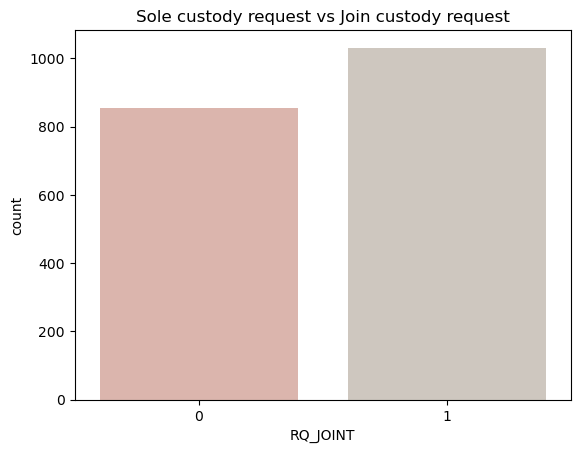

In [128]:
base_rates.percentages(df, "RQ_JOINT", "Sole custody request", "Join custody request")

<div class="alert alert-block alert-warning col-md-12">

<p>
There are 1031 (54.81%) joint custody requests and 850 (45.19%) sole custody requests in the dataset. The data is quite balanced in this sense. <br>
</p>

</div>

### Request nature by plaintiff gender

PLAIN_ML = 0 -->  RQ_JOINT: Counter({0: 651, 1: 102})

Sole custody request by females: 86.45%
Join custody request by females: 13.55%


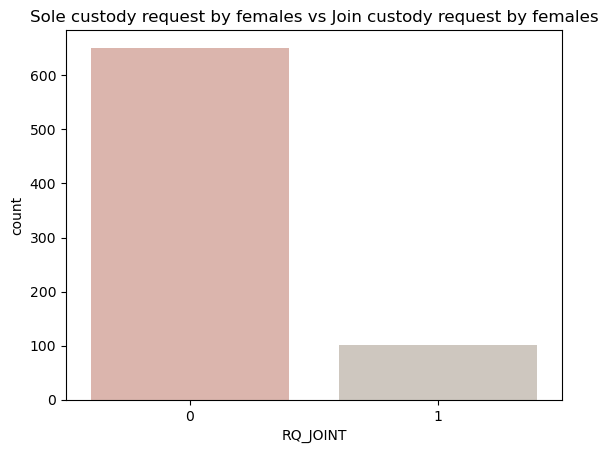


PLAIN_ML = 1 -->  RQ_JOINT: Counter({1: 929, 0: 202})

Sole custody request by males: 17.86%
Join custody request by males: 82.14%


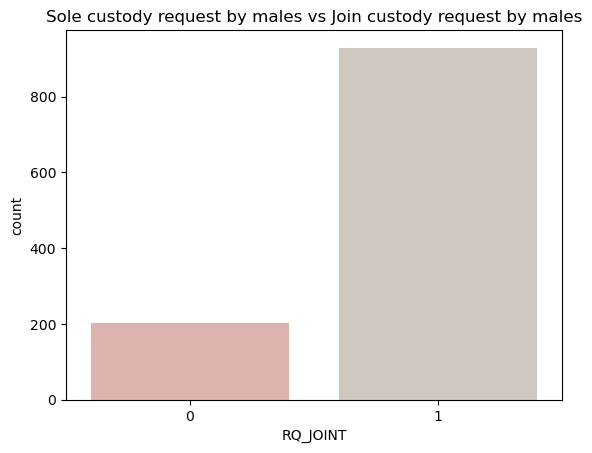

In [129]:
base_rates.percentages_by_group(df, "RQ_JOINT", "PLAIN_ML", "Join custody request by females", "Join custody request by males", zero_case = True, group_1_zero = "Sole custody request by females", group_2_zero = "Sole custody request by males", plot = True)

<div class="alert alert-block alert-warning col-md-12">

<p>
We can clearly observe that females tend to ask more for sole custody (86.45%) and males tend to ask more for joint custody (82.14%).<br><br>
    
Taking into account this percentages, and that joint custody win percentage is higher (21.34%, versus the 13.53% for sole custody). An hypothesis may be that this is the reason, or one of the reasons, why males have a higher winning percentage (20.07%, versus the 14.34% for female plaintiffs).    

</p>

</div>

### Request nature by judge gender

JUDGE_ML = 0 -->  RQ_JOINT: Counter({1: 379, 0: 311})

Sole custody request with female judge: 45.07%
Join custody request with female judge: 54.93%


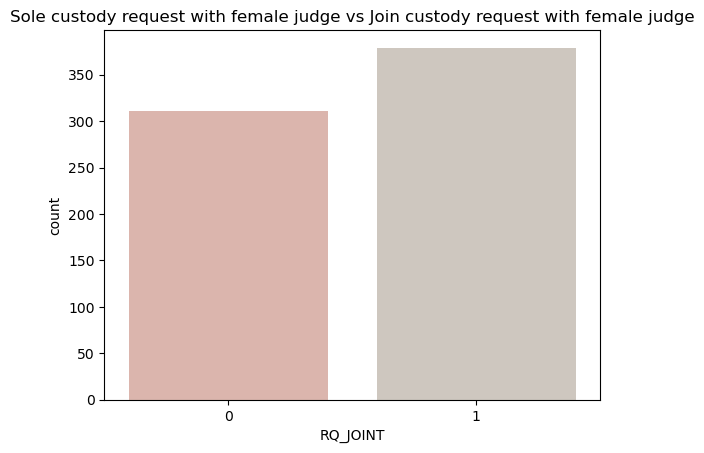


JUDGE_ML = 1 -->  RQ_JOINT: Counter({1: 652, 0: 542})

Sole custody request with male judge: 45.39%
Join custody request with male judge: 54.61%


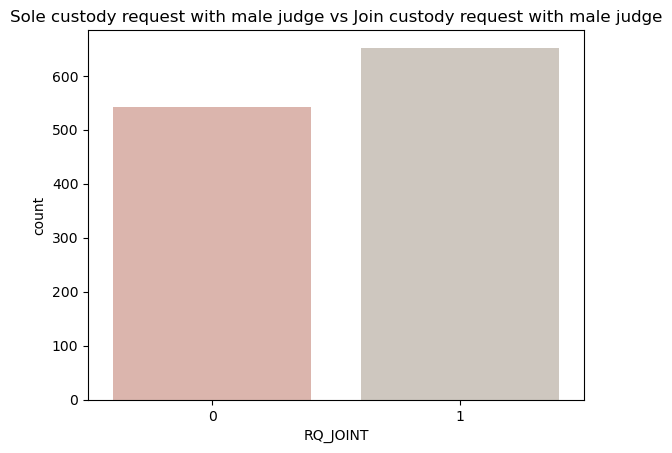

In [130]:
base_rates.percentages_by_group(df, "RQ_JOINT", "JUDGE_ML", "Join custody request with female judge", "Join custody request with male judge", zero_case = True, group_1_zero = "Sole custody request with female judge", group_2_zero = "Sole custody request with male judge", plot = True)

<div class="alert alert-block alert-warning col-md-12">

<p>
We can observe that in both cases the percentage of sole and joint custody sentences is balanced. And that there is no diference in the percentages between female and male judges.<br>
</p>

</div>

## Request nature victory rates

In [131]:
base_rates.percentages_by_group(df, "WINWIN", "RQ_JOINT", "Sole custody win percentage", "Joint custody win percentage")

RQ_JOINT = 0 -->  WINWIN: Counter({0: 738, 1: 115})

Sole custody win percentage: 13.48%

RQ_JOINT = 1 -->  WINWIN: Counter({0: 811, 1: 220})

Joint custody win percentage: 21.34%


<div class="alert alert-block alert-warning col-md-12">

<p>
13.53% of the cases were the plaintiff requests for sole custody are won and 21.34% of the cases where the plaintiff asks for joint custody are won. Thus, joint custody requests are more likely to be won.
</p>

</div>

### Request nature victory rates by plaintiff gender

In [132]:
base_rates.percentages_cross_groups(df, "WINWIN", "PLAIN_ML", "RQ_JOINT", "female plaintiff", "male plaintiff", "sole custody", "joint custody")

WINWIN percentage for female plaintiff, sole custody --> 14.13%
WINWIN percentage for female plaintiff, joint custody --> 15.69%
WINWIN percentage for male plaintiff, sole custody --> 11.39%
WINWIN percentage for male plaintiff, joint custody --> 21.96%


<div class="alert alert-block alert-warning col-md-12">

<p>
Females have aproximately same chances to win sole or joint custody. Males have less chances to win sole custody than females and more chances to win joint custody than females.
</p>

</div>

In [133]:
df_request_sole, df_request_joint = base_rates.df_by_group(df, "RQ_JOINT")

print("SOLE CUSTODY REQUEST\n ----------------------------------------- \n")
statistical_analysis.k_test(df_request_sole, "WINWIN", "PLAIN_ML")
print("\n ----------------------------------------- \n")

print("JOINT CUSTODY REQUEST\n ----------------------------------------- \n")
statistical_analysis.k_test(df_request_joint, "WINWIN", "PLAIN_ML")
print("\n ----------------------------------------- \n")

SOLE CUSTODY REQUEST
 ----------------------------------------- 

Kolmogorov-Smirnov test to determine if there is significant difference between the two groups by quantifying the difference between the arithmetic means 

------> Statistic: 67556.5

------> p-value: 0.3185543950996156

Since p-value is not smaller than alpha, we CANNOT reject the null hypothesis H0.

 ----------------------------------------- 

JOINT CUSTODY REQUEST
 ----------------------------------------- 

Kolmogorov-Smirnov test to determine if there is significant difference between the two groups by quantifying the difference between the arithmetic means 

------> Statistic: 44407.0

------> p-value: 0.14240866075541736

Since p-value is not smaller than alpha, we CANNOT reject the null hypothesis H0.

 ----------------------------------------- 



### Request nature victory rates by judge gender

In [134]:
base_rates.percentages_cross_groups(df, "WINWIN", "JUDGE_ML", "RQ_JOINT", "female judge", "male judge", "sole custody", "joint custody")

WINWIN percentage for female judge, sole custody --> 16.72%
WINWIN percentage for female judge, joint custody --> 23.75%
WINWIN percentage for male judge, sole custody --> 11.62%
WINWIN percentage for male judge, joint custody --> 19.94%


<div class="alert alert-block alert-warning col-md-12">

<p>
Both female and male judges are more involved in joint custody winning cases than in sole custody winning cases. Also, there is more difference between joint and sole winning percentage in sentences handed down by male judges.
</p>

</div>

In [135]:
print("SOLE CUSTODY REQUEST\n ----------------------------------------- \n")
statistical_analysis.k_test(df_request_sole, "WINWIN", "JUDGE_ML")
print("\n ----------------------------------------- \n")

print("JOINT CUSTODY REQUEST\n ----------------------------------------- \n")
statistical_analysis.k_test(df_request_joint, "WINWIN", "JUDGE_ML")
print("\n ----------------------------------------- \n")

SOLE CUSTODY REQUEST
 ----------------------------------------- 

Kolmogorov-Smirnov test to determine if there is significant difference between the two groups by quantifying the difference between the arithmetic means 

------> Statistic: 88576.5

------> p-value: 0.036054479307687334

Since p-value is smaller than alpha, we REJECT the null hypothesis H0. Thus, there is a significant difference between both groups

 ----------------------------------------- 

JOINT CUSTODY REQUEST
 ----------------------------------------- 

Kolmogorov-Smirnov test to determine if there is significant difference between the two groups by quantifying the difference between the arithmetic means 

------> Statistic: 128259.0

------> p-value: 0.15039833254397608

Since p-value is not smaller than alpha, we CANNOT reject the null hypothesis H0.

 ----------------------------------------- 



## Economic features (plaintiff)

### By type of request

In [136]:
base_rates.percentages_by_group(df, "RQ_MP_AT", "RQ_JOINT", "Request sole asks for maintenance payments attribution", "Request joint asks for maintenance payments attribution")

RQ_JOINT = 0 -->  RQ_MP_AT: Counter({0: 520, 1: 333})

Request sole asks for maintenance payments attribution: 39.04%

RQ_JOINT = 1 -->  RQ_MP_AT: Counter({0: 1000, 1: 31})

Request joint asks for maintenance payments attribution: 3.01%


In [137]:
base_rates.percentages_by_group(df, "RQ_MP_SP", "RQ_JOINT", "Request sole asks for maintenance payments suppression", "Request joint asks for maintenance payments suppression")

RQ_JOINT = 0 -->  RQ_MP_SP: Counter({0: 733, 1: 120})

Request sole asks for maintenance payments suppression: 14.07%

RQ_JOINT = 1 -->  RQ_MP_SP: Counter({1: 583, 0: 448})

Request joint asks for maintenance payments suppression: 56.55%


In [138]:
base_rates.percentages_by_group(df, "RQ_FH_AT", "RQ_JOINT", "Request sole asks for family home attribution", "Request joint asks for family home attribution")

RQ_JOINT = 0 -->  RQ_FH_AT: Counter({0: 758, 1: 95})

Request sole asks for family home attribution: 11.14%

RQ_JOINT = 1 -->  RQ_FH_AT: Counter({0: 947, 1: 84})

Request joint asks for family home attribution: 8.15%


In [139]:
base_rates.percentages_by_group(df, "RQ_FH_SP", "RQ_JOINT", "Request sole asks for family home suppression", "Request joint asks for family home suppression")

RQ_JOINT = 0 -->  RQ_FH_SP: Counter({0: 845, 1: 8})

Request sole asks for family home suppression: 0.94%

RQ_JOINT = 1 -->  RQ_FH_SP: Counter({0: 965, 1: 66})

Request joint asks for family home suppression: 6.4%


### Maintenance payments request (attribution and suppression)

In [140]:
base_rates.percentages_by_group(df, "RQ_MP_AT", "PLAIN_ML", "Female plaintiff asks for maintenance payments attribution", "Male plaintiff asks for maintenance payments attribution")

PLAIN_ML = 0 -->  RQ_MP_AT: Counter({0: 473, 1: 280})

Female plaintiff asks for maintenance payments attribution: 37.18%

PLAIN_ML = 1 -->  RQ_MP_AT: Counter({0: 1047, 1: 84})

Male plaintiff asks for maintenance payments attribution: 7.43%


In [141]:
base_rates.percentages_by_group(df, "RQ_MP_SP", "PLAIN_ML", "Female plaintiff asks for maintenance payments suppression", "Male plaintiff asks for maintenance payments suppression")

PLAIN_ML = 0 -->  RQ_MP_SP: Counter({0: 654, 1: 99})

Female plaintiff asks for maintenance payments suppression: 13.15%

PLAIN_ML = 1 -->  RQ_MP_SP: Counter({1: 604, 0: 527})

Male plaintiff asks for maintenance payments suppression: 53.4%


<div class="alert alert-block alert-warning col-md-12">

<p>
The percentages between female and male plaintiffs when asking for the attribution or the suppression of maintenance payments are highly imbalanced. Females tend to ask much more than males for the attribution and males tend to ask much more than females for their suppression.</p>

</div>

#### Maintenance payments request attribution and suppression - sole custody request

In [142]:
df_request_sole, df_request_joint = base_rates.df_by_group(df, "RQ_JOINT")

In [143]:
base_rates.percentages_by_group(df_request_sole, "RQ_MP_AT", "PLAIN_ML", "Female plaintiff asks for maintenance payments attribution", "Male plaintiff asks for maintenance payments attribution")

PLAIN_ML = 0 -->  RQ_MP_AT: Counter({0: 378, 1: 273})

Female plaintiff asks for maintenance payments attribution: 41.94%

PLAIN_ML = 1 -->  RQ_MP_AT: Counter({0: 142, 1: 60})

Male plaintiff asks for maintenance payments attribution: 29.7%


In [144]:
base_rates.percentages_by_group(df_request_sole, "RQ_MP_SP", "PLAIN_ML", "Female plaintiff asks for maintenance payments suppression", "Male plaintiff asks for maintenance payments suppression")

PLAIN_ML = 0 -->  RQ_MP_SP: Counter({0: 594, 1: 57})

Female plaintiff asks for maintenance payments suppression: 8.76%

PLAIN_ML = 1 -->  RQ_MP_SP: Counter({0: 139, 1: 63})

Male plaintiff asks for maintenance payments suppression: 31.19%


#### Maintenance payments request attribution and suppression - joint custody request

In [145]:
base_rates.percentages_by_group(df_request_joint, "RQ_MP_AT", "PLAIN_ML", "Female plaintiff asks for maintenance payments attribution", "Male plaintiff asks for maintenance payments attribution")

PLAIN_ML = 0 -->  RQ_MP_AT: Counter({0: 95, 1: 7})

Female plaintiff asks for maintenance payments attribution: 6.86%

PLAIN_ML = 1 -->  RQ_MP_AT: Counter({0: 905, 1: 24})

Male plaintiff asks for maintenance payments attribution: 2.58%


In [146]:
base_rates.percentages_by_group(df_request_joint, "RQ_MP_SP", "PLAIN_ML", "Female plaintiff asks for maintenance payments suppression", "Male plaintiff asks for maintenance payments suppression")

PLAIN_ML = 0 -->  RQ_MP_SP: Counter({0: 60, 1: 42})

Female plaintiff asks for maintenance payments suppression: 41.18%

PLAIN_ML = 1 -->  RQ_MP_SP: Counter({1: 541, 0: 388})

Male plaintiff asks for maintenance payments suppression: 58.23%


### Family home request (attribution and suppression)

In [147]:
base_rates.percentages_by_group(df, "RQ_FH_AT", "PLAIN_ML", "Female plaintiff asks for family home attribution", "Male plaintiff asks for family home attribution")

PLAIN_ML = 0 -->  RQ_FH_AT: Counter({0: 666, 1: 87})

Female plaintiff asks for family home attribution: 11.55%

PLAIN_ML = 1 -->  RQ_FH_AT: Counter({0: 1039, 1: 92})

Male plaintiff asks for family home attribution: 8.13%


In [148]:
base_rates.percentages_by_group(df, "RQ_FH_SP", "PLAIN_ML", "Female plaintiff asks for family home suppression", "Male plaintiff asks for family home suppression")

PLAIN_ML = 0 -->  RQ_FH_SP: Counter({0: 744, 1: 9})

Female plaintiff asks for family home suppression: 1.2%

PLAIN_ML = 1 -->  RQ_FH_SP: Counter({0: 1066, 1: 65})

Male plaintiff asks for family home suppression: 5.75%


<div class="alert alert-block alert-warning col-md-12">

<p>
For the family home attribution or suppression request, we can see the same pattern as in the maintenance payments request, although the differences are not that extreme.</p>

</div>

#### Family home request (attribution and suppression) - sole custody

In [149]:
base_rates.percentages_by_group(df_request_sole, "RQ_FH_AT", "PLAIN_ML", "Female plaintiff asks for family home attribution", "Male plaintiff asks for family home attribution")

PLAIN_ML = 0 -->  RQ_FH_AT: Counter({0: 571, 1: 80})

Female plaintiff asks for family home attribution: 12.29%

PLAIN_ML = 1 -->  RQ_FH_AT: Counter({0: 187, 1: 15})

Male plaintiff asks for family home attribution: 7.43%


In [150]:
base_rates.percentages_by_group(df_request_sole, "RQ_FH_SP", "PLAIN_ML", "Female plaintiff asks for family home suppression", "Male plaintiff asks for family home suppression")

PLAIN_ML = 0 -->  RQ_FH_SP: Counter({0: 647, 1: 4})

Female plaintiff asks for family home suppression: 0.61%

PLAIN_ML = 1 -->  RQ_FH_SP: Counter({0: 198, 1: 4})

Male plaintiff asks for family home suppression: 1.98%


#### Family home request (attribution and suppression) - joint custody

In [151]:
base_rates.percentages_by_group(df_request_joint, "RQ_FH_AT", "PLAIN_ML", "Female plaintiff asks for family home attribution", "Male plaintiff asks for family home attribution")

PLAIN_ML = 0 -->  RQ_FH_AT: Counter({0: 95, 1: 7})

Female plaintiff asks for family home attribution: 6.86%

PLAIN_ML = 1 -->  RQ_FH_AT: Counter({0: 852, 1: 77})

Male plaintiff asks for family home attribution: 8.29%


In [152]:
base_rates.percentages_by_group(df_request_joint, "RQ_FH_SP", "PLAIN_ML", "Female plaintiff asks for family home suppression", "Male plaintiff asks for family home suppression")

PLAIN_ML = 0 -->  RQ_FH_SP: Counter({0: 97, 1: 5})

Female plaintiff asks for family home suppression: 4.9%

PLAIN_ML = 1 -->  RQ_FH_SP: Counter({0: 868, 1: 61})

Male plaintiff asks for family home suppression: 6.57%


## Location

In [153]:
Counter(df["AUT_COMM"]).most_common()

[('Cataluña', 321),
 ('Andalucía', 255),
 ('Castilla y León', 250),
 ('Comunidad de Madrid', 224),
 ('Comunidad Valenciana', 147),
 ('Castilla-La Mancha', 82),
 ('Galicia', 81),
 ('Islas Baleares', 74),
 ('Asturias', 70),
 ('País Vasco', 69),
 ('Aragón', 69),
 ('Región de Murcia', 52),
 ('Navarra', 43),
 ('Extremadura', 42),
 ('Cantabria', 30),
 ('Castilla - La Mancha', 27),
 ('Canarias', 27),
 ('La Rioja', 14),
 ('Galícia', 4),
 ('Melilla', 3)]

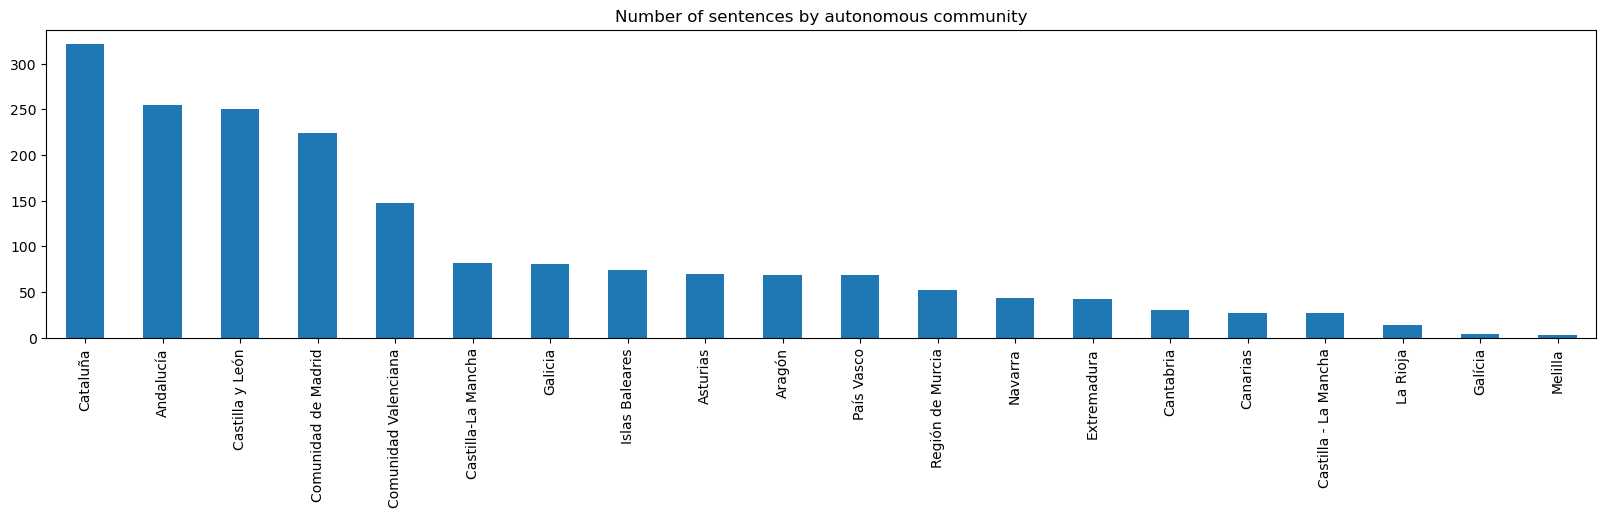

In [154]:
fig = plt.figure(figsize=(20,4))
df["AUT_COMM"].value_counts(sort=True).plot.bar()
plt.title("Number of sentences by autonomous community")
plt.show()

In [155]:
num_sentences_by_region = Counter(df["AUT_COMM"]).most_common()
num_sentences_by_region_dict = dict((x, y) for x, y in num_sentences_by_region)
dict_v = list(num_sentences_by_region_dict.values())

print("Mean sentences by region: " + str(np.mean(dict_v)))
print("Standard deviation of sentences by region: " + str(round(np.std(dict_v),2)))

Mean sentences by region: 94.2
Standard deviation of sentences by region: 91.37


In [156]:
num_sentences_by_region_dict

{'Cataluña': 321,
 'Andalucía': 255,
 'Castilla y León': 250,
 'Comunidad de Madrid': 224,
 'Comunidad Valenciana': 147,
 'Castilla-La Mancha': 82,
 'Galicia': 81,
 'Islas Baleares': 74,
 'Asturias': 70,
 'País Vasco': 69,
 'Aragón': 69,
 'Región de Murcia': 52,
 'Navarra': 43,
 'Extremadura': 42,
 'Cantabria': 30,
 'Castilla - La Mancha': 27,
 'Canarias': 27,
 'La Rioja': 14,
 'Galícia': 4,
 'Melilla': 3}

## Unique judges

In [157]:
Counter(df["JUDGE_ID"]).most_common()

[(31, 38),
 (152, 31),
 (3, 29),
 (101, 29),
 (30, 25),
 (147, 25),
 (148, 25),
 (151, 25),
 (27, 24),
 (23, 23),
 (153, 23),
 (264, 23),
 (21, 21),
 (159, 21),
 (118, 20),
 (29, 19),
 (19, 18),
 (46, 18),
 (246, 18),
 (244, 17),
 (251, 17),
 (282, 17),
 (26, 16),
 (67, 16),
 (102, 16),
 (284, 16),
 (287, 16),
 (156, 15),
 (306, 15),
 (307, 15),
 (1, 14),
 (119, 14),
 (120, 14),
 (267, 14),
 (285, 14),
 (22, 13),
 (66, 13),
 (243, 13),
 (245, 13),
 (289, 13),
 (186, 12),
 (272, 12),
 (288, 12),
 (10, 11),
 (32, 11),
 (150, 11),
 (230, 11),
 (293, 11),
 (309, 11),
 (115, 10),
 (123, 10),
 (178, 10),
 (179, 10),
 (235, 10),
 (266, 10),
 (0, 9),
 (17, 9),
 (25, 9),
 (42, 9),
 (44, 9),
 (79, 9),
 (161, 9),
 (184, 9),
 (187, 9),
 (273, 9),
 (292, 9),
 (310, 9),
 (9, 8),
 (11, 8),
 (33, 8),
 (48, 8),
 (49, 8),
 (77, 8),
 (85, 8),
 (103, 8),
 (155, 8),
 (181, 8),
 (239, 8),
 (247, 8),
 (249, 8),
 (2, 7),
 (43, 7),
 (73, 7),
 (76, 7),
 (78, 7),
 (82, 7),
 (104, 7),
 (130, 7),
 (194, 7),
 (198,

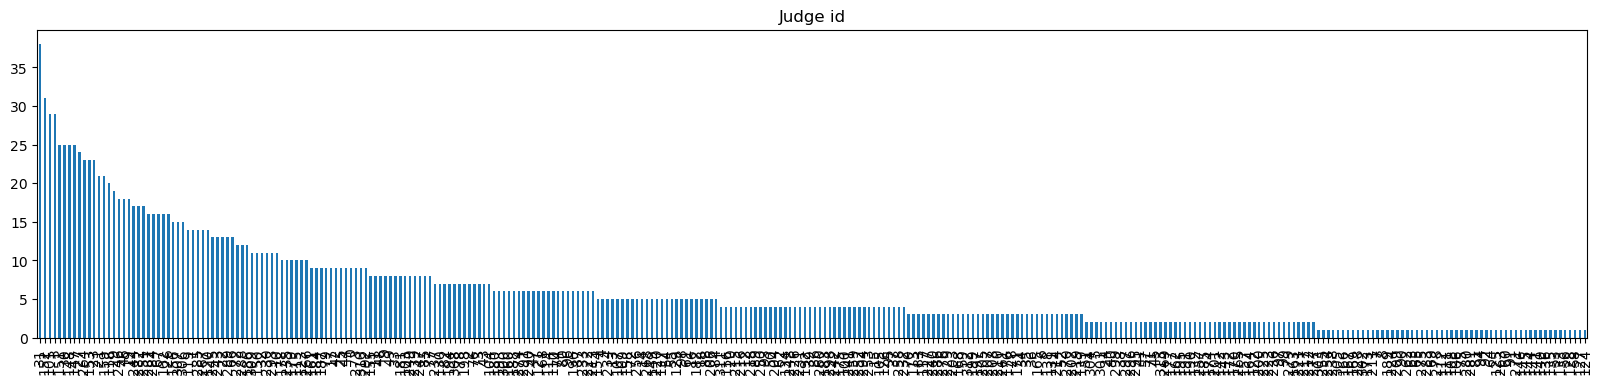

In [158]:
fig = plt.figure(figsize=(20,4))
df["JUDGE_ID"].value_counts(sort=True).plot.bar()
plt.title("Judge id")
plt.show()

### Gender distribution

In [159]:
print("The number of unique judges is: " + str(len(df["JUDGE_ID"].unique())))

The number of unique judges is: 314


In [160]:
df_unique_judges = df.drop_duplicates('JUDGE_ID')
print(len(df_unique_judges))
df_unique_judges.head(3)

314


,DATE,YEAR,Train,ID,URL,HQ,AUT_COMM,PLAIN_ML,PLAIN_WO,DEFEN_ML,...,FT_AG,LN_JNPREF_b,LN_JNPREF,FT_SL_IN_b,FT_JN_IN_b,FT_SL_IN,FT_JN_IN,JUDGE_ML,JUDGE_ID,Unnamed: 113
0,43362,2018,1,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,3,2,5,4,1,0,NaN
1,43621,2019,0,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,1,1,1,3,1,1,NaN
3,43600,2019,0,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,Alicante,Comunidad Valenciana,1,0,0,...,0,0,0,2,1,3,2,0,2,NaN


Counter({1: 186, 0: 128})


Female plaintiff: 40.76%
Male plaintiff: 59.24%




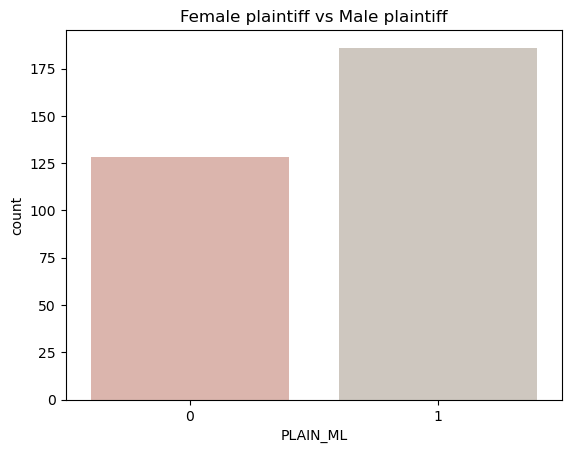

In [161]:
base_rates.percentages(df_unique_judges, "PLAIN_ML", "Female plaintiff", "Male plaintiff")